## Testing for the UpSet Python API - UpSetPlot
Implementation of the documentation, found at link below.
- documentation: https://upsetplot.readthedocs.io/en/latest/ 
- GitHub: https://github.com/jnothman/upsetplot/blob/master/doc/index.rst

# Example 1

In [5]:
from upsetplot import generate_counts
from upsetplot import plot
from matplotlib import pyplot

example = generate_counts()
print(example)

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64


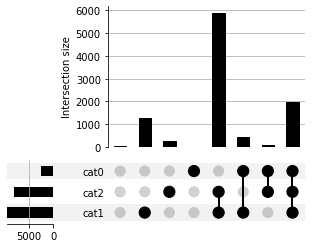

In [8]:
plot(example)
pyplot.show()

# Rotated view

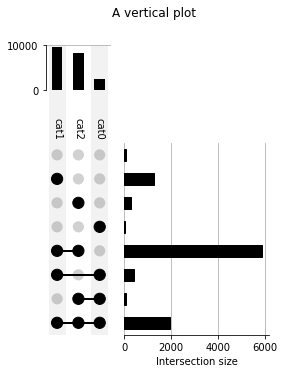

In [11]:
from matplotlib import pyplot as plt
from upsetplot import generate_counts, plot

example = generate_counts()
plot(example, orientation='vertical')
plt.suptitle('A vertical plot')
plt.show()

In [12]:
# Distribution

In [14]:
import pandas as pd
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from upsetplot import UpSet

# Load the dataset into a DataFrame
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# Get five features most correlated with median house value
correls = boston_df.corrwith(pd.Series(boston.target),
                             method='spearman').sort_values()
top_features = correls.index[-5:]

# Get a binary indicator of whether each top feature is above average
boston_above_avg = boston_df > boston_df.median(axis=0)
boston_above_avg = boston_above_avg[top_features]
boston_above_avg = boston_above_avg.rename(columns=lambda x: x + '>')

# Make this indicator mask an index of boston_df
boston_df = pd.concat([boston_df, boston_above_avg],
                      axis=1)
boston_df = boston_df.set_index(list(boston_above_avg.columns))

# Also give us access to the target (median house value)
boston_df = boston_df.assign(median_value=boston.target)

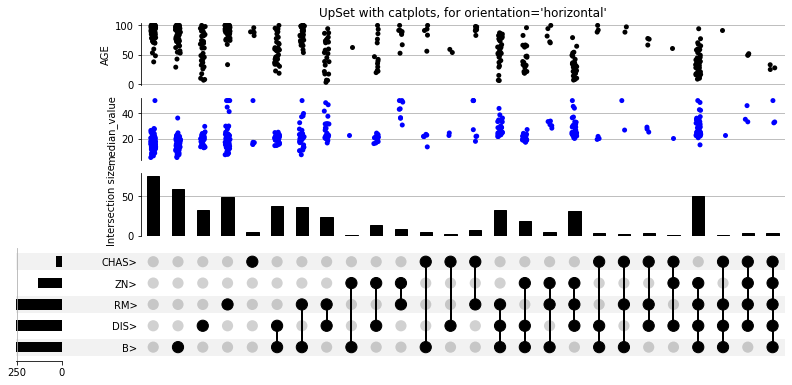

In [16]:
# UpSet plot it!
upset = UpSet(boston_df, subset_size='count', intersection_plot_elements=3)
upset.add_catplot(value='median_value', kind='strip', color='blue')
upset.add_catplot(value='AGE', kind='strip', color='black')
upset.plot()
plt.title("UpSet with catplots, for orientation='horizontal'")
plt.show()